**Question 1a**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the seen dataset
data = np.loadtxt('PADL-Q11-train.csv', delimiter=',', skiprows=1, usecols=range(0, 6))
x = data[:, 0:5]
y = data[:, 5]

# Split the seen dataset into 80% train, 20% test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

# Apply Polynomial transformation to the data
poly = PolynomialFeatures(degree=2, include_bias=True)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.transform(test_x)

# Train the model
poly_model = LinearRegression()
poly_model.fit(train_x_poly, train_y)

# Test the model on the seen test set
pred_y = poly_model.predict(test_x_poly)
r2 = r2_score(test_y, pred_y)
print("R2 score: ", r2)

R2 score:  1.0


**Question 1a unseen**

In [ ]:
# Load the unseen test set
data = np.loadtxt('PADL-Q11-unseen.csv', delimiter=',', skiprows=1, usecols=range(0, 6))
x = data[:, 0:5]
y = data[:, 5]

# Apply polinomial transformation to the data
x_poly = poly.fit_transform(x)

# Test the model on the unseen test set
pred_y = poly_model.predict(x_poly)
r2 = r2_score(y, pred_y)
print("R2 score: ", r2)

R2 score:  1.0


**Question 1b**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
np.set_printoptions(suppress=True, precision=6) # Remove scientifc notation e from printed coefficiant values

# Load the seen dataset and split into x and y
data = np.loadtxt('PADL-Q12-train.csv', delimiter=',', skiprows=1, usecols=range(0, 5))
x = data[:, 0:4]
y = data[:, 4]

# Split the seen dataset into 80% train, 20% test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)


# Create the model and train (Vanilla)
vanilla = linear_model.LinearRegression()
vanilla.fit(train_x, train_y)

# Create the regularised model (Lasso) and train
lasso = linear_model.Lasso(alpha=14)
lasso.fit(train_x, train_y)


# Test the performance of the vanilla model and print coefficiants
vanilla_y_hat = vanilla.predict(test_x)
vanilla_r2 = r2_score(test_y, vanilla_y_hat)
print('Vanilla model R2: ',r2)
print("Vanilla model Coefficients: ",vanilla.coef_)
print()


# Test the performance of the regularised model and print coefficiants
lasso_y_hat = lasso.predict(test_x)
lasso_r2 = r2_score(test_y, lasso_y_hat)
print('Regularised model R2: ',lasso_r2)
print("Regularised model Coefficients: ",lasso.coef_)
print()

# Check if regularised model is still within the 10% R2 performance threshold of the vanilla model
if(lasso_r2 >= 0.9*vanilla_r2):
    print("Acceptable - within 10% tolerance.")
else:
    print("Not acceptable")


Vanilla model R2:  1.0
Vanilla model Coefficients:  [0.060061 3.053668 1.006432 0.070835]

Regularised model R2:  0.934535051713459
Regularised model Coefficients:  [0.059384 1.490664 0.946846 0.      ]

Acceptable - within 10% tolerance.


**Question 1b unseen**

In [ ]:
# Load and split the unseen test set
data = np.loadtxt('PADL-Q12-unseen.csv', delimiter=',', skiprows=1, usecols=range(0, 5))
x = data[:, 0:4]
y = data[:, 4]

# Test the performance of the Vanilla model and print coefficiants on the unseen test set
vanilla_y_hat = vanilla.predict(x)
r2 = r2_score(y, vanilla_y_hat)
print('Vanilla model R2: ',r2)
print("Vanilla model Coefficients: ", vanilla.coef_)
print()

# Test the performance of the Regularised model and print coefficiants on the unseen test set
lasso_y_hat = lasso.predict(x)
r2 = r2_score(y, lasso_y_hat)
print('Regularised model R2: ',r2)
print("Regularised model Coefficients: ",(lasso.coef_))
print()


Vanilla model R2:  0.9599070574592169
Vanilla model Coefficients:  [0.060061 3.053668 1.006432 0.070835]

Regularised model R2:  0.9254713212919085
Regularised model Coefficients:  [0.059384 1.490664 0.946846 0.      ]



**Question 1c**

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
# Import the Dataset and split into inputs and label
data = np.loadtxt('PADL-Q13-train.csv', delimiter=',', skiprows=1, usecols=range(0, 6))
x = data[:, 0:5]
y = data[:, 5]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15, random_state=1)



# Vanilla model without preprocessing
vanilla = linear_model.LinearRegression()
vanilla.fit(train_x, train_y)
vanilla_y_hat = vanilla.predict(test_x)
vanilla_r2 = r2_score(test_y, vanilla_y_hat)
print('Vanilla Coefficient of determination:', vanilla_r2)



# Vanilla model with preprocessing
# 1) Minor Anomaly Removal
iso = IsolationForest(contamination=0.011, random_state=1)
inliers = iso.fit_predict(train_x) == 1
train_x_clean = train_x[inliers]
train_y_clean = train_y[inliers]
# 2) Scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x_clean)
test_x_scaled = scaler.transform(test_x)

preprocessed_model = linear_model.LinearRegression()
preprocessed_model.fit(train_x_scaled, train_y_clean)
preprocessed_y_hat = preprocessed_model.predict(test_x_scaled)
preprocessed_r2 = r2_score(test_y, preprocessed_y_hat)
print('Preprocessed R2:', preprocessed_r2)


if(preprocessed_r2 > vanilla_r2):
  print("improvement in performance with preprocessing by:", preprocessed_r2 - vanilla_r2)
else:
  print("No performance gains")


Vanilla Coefficient of determination: 0.9619873781136123
Preprocessed R2: 0.962039731082215
improvement in performance with preprocessing by: 5.235296860262029e-05


**Question 1c unseen**

In [ ]:
unseen_data = np.loadtxt('PADL-Q13-unseen.csv', delimiter=',', skiprows=1, usecols=range(0, 6))
unseen_x = unseen_data[:, 0:5]
unseen_y = unseen_data[:, 5]

# Without Preprocessing
unseen_y_hat = vanilla.predict(unseen_x)

# With Preprocessing
unseen_x_scaled = scaler.transform(unseen_x)
unseen_preprocessed_y_hat = preprocessed_model.predict(unseen_x_scaled)

# Evaluate models
unseen_vanilla_r2 = r2_score(unseen_y, unseen_y_hat)
unseen_preprocessed_r2 = r2_score(unseen_y, unseen_preprocessed_y_hat)
print("without preprocessing model r2:", unseen_vanilla_r2)
print("With preprocessing model r2:", unseen_preprocessed_r2)

if(unseen_preprocessed_r2 > unseen_vanilla_r2):
  print("improvement in performance with preprocessing by:", unseen_preprocessed_r2 - unseen_vanilla_r2)
else:
  print("No performance gains")

without preprocessing model r2: 0.9657482090704439
With preprocessing model r2: 0.9657401304228902
No performance gains


**Question 2a**

number of unique labels:  4


<Figure size 1200x500 with 0 Axes>

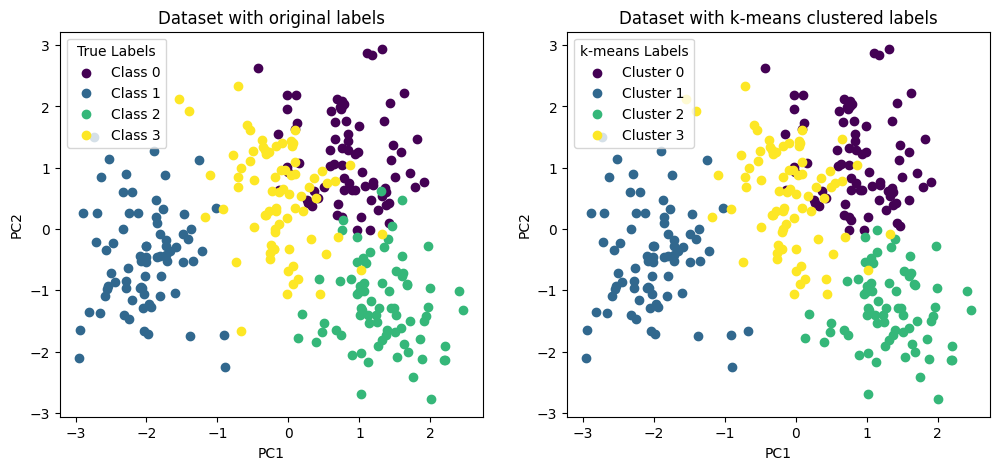

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Get the dataset and split it into inputs variables x,y
data = np.loadtxt('PADL-Q2.csv',delimiter=',',skiprows=1,usecols=range(0,6))
x1 = data[:,0:5]
y1 = data[:,5]

# identify the number of unique labels
labels = np.unique(y1)
print("number of unique labels: ",len(labels))

# Apply k-means clustering to the unprocessed dataset
clustered_x1 = KMeans(n_clusters=len(labels), random_state=0, n_init='auto').fit_predict(x1)


# Standardise the the dataset, then apply PCA
scaler1 = StandardScaler()
standardised_x1 = scaler1.fit_transform(x1)
pca1 = PCA(n_components=2)
pca_x1 = pca1.fit_transform(standardised_x1)
evr_case_1 = pca1.explained_variance_ratio_
# Manually Swap clusters 2 and 3 as they have been swapped – k-means assigns arbritary class names to clusters - in this
# case its obvious that clusters 2 and 3 are the opposite way around compared to the orignal class labeled dataset, by visual inspection.
clustered_x_swapped1 = clustered_x1.copy()
clustered_x_swapped1[clustered_x1 == 2] = -1
clustered_x_swapped1[clustered_x1 == 3] = 2
clustered_x_swapped1[clustered_x_swapped1 == -1] = 3

# Plot the orginal class labels and the predicted class labels
plt.figure(figsize=(12, 5))
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the dataset with original class labels
plt.subplot(1, 2, 1)
plt.title('Dataset with original labels')
cmap = plt.get_cmap("viridis")
colors = [cmap(i / (len(labels) - 1)) for i in range(len(labels))]
for i, label in enumerate(labels):
    plt.scatter(
        pca_x1[y1 == label, 0], pca_x1[y1 == label, 1],
        color=colors[i],
        label=f'Class {int(label)}'
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='True Labels')

# Plot the data with the predicted labels from k-means clustering
plt.subplot(1, 2, 2)
plt.title('Dataset with k-means clustered labels')
for i, cluster in enumerate(labels):
    plt.scatter(
        pca_x1[clustered_x_swapped1 == cluster, 0],
        pca_x1[clustered_x_swapped1 == cluster, 1],
        color=colors[i],
        label=f'Cluster {int(cluster)}'
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='k-means Labels')
plt.show()

 I Manually Swapped clusters 2 and 3 as they are the other way around – k-means assigns arbritary class names to clusters - in this case its obvious that clusters 2 and 3 are the opposite way around compared to the orignal class labeled dataset, by visual inspection.

**Question 2b**

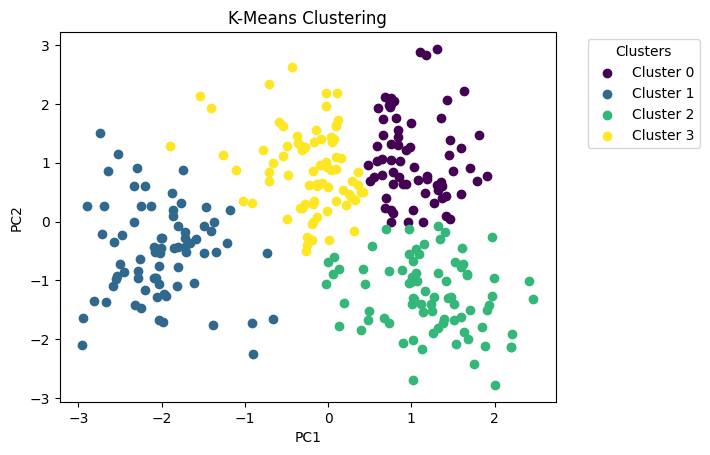

In [ ]:
# Apply k-means clustering to the PCA transformed data
data = np.loadtxt('PADL-Q2.csv',delimiter=',',skiprows=1,usecols=range(0,6))
x2 = data[:,0:5]
y2 = data[:,5]

scaler2 = StandardScaler()
standardised_x2 = scaler2.fit_transform(x2)
pca2 = PCA(n_components=2)
pca_x2 = pca2.fit_transform(standardised_x2)

pca_clustered_x2 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit_predict(pca_x2)
evr_case_2 = pca2.explained_variance_ratio_

# use the viridis colormap
cmap = plt.get_cmap("viridis")
colors = [cmap(i / (4 - 1)) for i in range(4)]

# make scatter plot
for cluster in np.unique(pca_clustered_x2):
    plt.scatter(
        pca_x2[pca_clustered_x2 == cluster, 0],
        pca_x2[pca_clustered_x2 == cluster, 1],
        color=colors[cluster],
        label=f"Cluster {cluster}",
    )

plt.legend(title="Clusters", loc='best',bbox_to_anchor=(1.05, 1))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering")
plt.show()

**Question 2c**

In [ ]:
# count how many labels are correct for clustering in question 2a and 2b
correct_pca_first = 0
correct_pca_after = 0

for i in range(0,len(y2)):
  if (pca_clustered_x2[i] == y2[i]):
    correct_pca_first += 1

for i in range(0,len(y1)):
  if (clustered_x_swapped1[i] == y1[i]):
    correct_pca_after += 1


percentage_of_variance_by_PC1_PC2 = evr_case_1[0] + evr_case_1[1]
# case 1 and 2 are the same therefore:
percentage_of_variance_by_PC1_PC2 = round((evr_case_1[0] + evr_case_1[1]) * 100,1)


accuracy_case_1 = correct_pca_after/300 * 100
accuracy_case_2 = correct_pca_first/300 * 100
print(f'Correctly clustered for Case 1 (Clustering followed by PCA): {round(accuracy_case_1,2)}%')
print(f'Correctly clustered for Case 2 (PCA then followed by clustering): {round(accuracy_case_2,2)}%')
print(f'Relative loss in accuracy between case 1 and 2 is {round(accuracy_case_1 - accuracy_case_2,1)}%, with percentage of variance in the data represented by PC1 and PC2 {percentage_of_variance_by_PC1_PC2}%')

Correctly clustered for Case 1 (Clustering followed by PCA): 96.67%
Correctly clustered for Case 2 (PCA then followed by clustering): 86.33%
Relative loss in accuracy between case 1 and 2 is 10.3%, with percentage of variance in the data represented by PC1 and PC2 66.4%


**Question 3a**

In [ ]:
!pip uninstall -y numpy gensim
!pip install numpy==1.24.0
!pip install gensim


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 113.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.0 which is incompatible.
albumentations 2.0.7 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
albumentations 2.0.7 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.0 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you hav

In [ ]:
from gensim.models import Word2Vec

In [ ]:
from gensim.models import Word2Vec

# Load the data
with open('PADL-Q3.txt', 'r') as file:
    walks = [line.strip().split() for line in file if line.strip()]

# train a Word2Vec model
model = Word2Vec(
    sentences=walks,
    vector_size=100,
    window=6,
    min_count=1,
    sg=1,
    workers=4,
    epochs=16,
)

# compute and print similarities
print("Cosine similarities between node '5' and nodes '21' to '30':")
for i in range(21, 31):
    node = str(i)
    if node in model.wv and '5' in model.wv:
        similarity = model.wv.similarity('5', node)
        print(f"Similarity(5, {node}) = {similarity:.4f}")
    else:
        print(f"Node {node} or node 5 not in vocabulary.")

Cosine similarities between node '5' and nodes '21' to '30':
Similarity(5, 21) = 0.0995
Similarity(5, 22) = 0.1347
Similarity(5, 23) = 0.2833
Similarity(5, 24) = 0.2462
Similarity(5, 25) = 0.1307
Similarity(5, 26) = 0.1700
Similarity(5, 27) = 0.2052
Similarity(5, 28) = 0.2163
Similarity(5, 29) = 0.1028
Similarity(5, 30) = 0.1661


**Question 3b**

In [ ]:
nodes = model.wv.index_to_key

output_lines = []

for node in nodes:
    similar_nodes = model.wv.most_similar(node, topn=len(nodes)-1)
    ordered_node_ids = [sim[0] for sim in similar_nodes]
    output_lines.append(" ".join(ordered_node_ids))

with open("PADL-Q3-result.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

# saved to local session storage

**Question 4a**

1. The architecture has 5 input nodes and 1 output node, making use of all available input features and outputting a single prediction value as a real number – predicted waist size.

2. The architecture makes use of 4 hidden layers with 16,32,32,16 nodes respectivley - suitably large enough to allow for the modelling of complex relationships without overfitting by using too large of a network.

3. ReLU is used after each layer to introduce non-linearity allowing for the modelling of more complex relationships in the data.

4. Adam optimiser with weight decay and a StepLR scheduler improves convergence and generalisation.

5. L1 loss is used over L2 as it better suited to the testing metric MAE, and is suitable for regression tasks like this one.

6. Residual network was not chosen as it offered no benefit, recurrent network was not suitable as the data is not sequential, therefore a 'vanilla' MLP was chosen.

**Question 4b**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

In [ ]:
# Load the dataset and remove any rows with missing values
data = np.genfromtxt('body_measurements.csv', delimiter=',', dtype=float, encoding=None, missing_values="", filling_values=np.nan, skip_header=1)
data = data[~np.any(np.isnan(data), axis=1)]

# Split the data into inputs (X) and labels (Y)
x = data[:, 0:5]
y = data[:, 5]

# Create the test, train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scale the the data
x_scaler_q4 = StandardScaler()
x_train_s = x_scaler_q4.fit_transform(x_train)
x_test_s = x_scaler_q4.transform(x_test)
y_scaler_q4 = StandardScaler()
y_train_s = y_scaler_q4.fit_transform(y_train.reshape(-1, 1))

# Convert NumPy data to tensors
x_train_s = torch.tensor(x_train_s, dtype=torch.float32)
x_test_s = torch.tensor(x_test_s, dtype=torch.float32)
y_train_s = torch.tensor(y_train_s, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


# Create Dataloader for training
train_dataset = TensorDataset(x_train_s, y_train_s)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# save the scalers for later use
joblib.dump(x_scaler_q4, 'x_scaler_q4.pkl')
joblib.dump(y_scaler_q4, 'y_scaler_q4.pkl')

['y_scaler_q4.pkl']

In [ ]:
class Model(nn.Module):
  def __init__(self, hiddenSize, hiddenSize2, hiddenSize3, hiddenSize4):
    super(Model, self).__init__()
    self.linear1 = nn.Linear(5, hiddenSize)
    self.linear2 = nn.Linear(hiddenSize, hiddenSize2)
    self.linear3 = nn.Linear(hiddenSize2, hiddenSize3)
    self.linear4 = nn.Linear(hiddenSize3, hiddenSize4)
    self.linear5 = nn.Linear(hiddenSize4, 1)
    self.relu = nn.ReLU()


  def forward(self, x):
    y = self.relu(self.linear1(x))
    y = self.relu(self.linear2(y))
    y = self.relu(self.linear3(y))
    y = self.relu(self.linear4(y))
    y = self.linear5(y)
    return y

model = Model(16, 32, 32, 16)

Epoch 0, Avg Loss: 0.47846695482730867
Epoch 20, Avg Loss: 0.28310553530852
Epoch 40, Avg Loss: 0.27640393806828395
Epoch 60, Avg Loss: 0.28201151920689477
Epoch 80, Avg Loss: 0.273434508840243
Epoch 100, Avg Loss: 0.2781751857863532
Epoch 120, Avg Loss: 0.2734980924261941
Epoch 140, Avg Loss: 0.2746619400050905
Epoch 160, Avg Loss: 0.28364773127767773
Epoch 180, Avg Loss: 0.27213038073645696
Epoch 200, Avg Loss: 0.27232353389263153
Epoch 220, Avg Loss: 0.2778263827164968
Epoch 240, Avg Loss: 0.2724424100584454
Epoch 260, Avg Loss: 0.2719998366302914
Epoch 280, Avg Loss: 0.2741820130083296
Epoch 300, Avg Loss: 0.2757128308216731
Epoch 320, Avg Loss: 0.28101017740037704
Epoch 340, Avg Loss: 0.27022690640555486
Epoch 360, Avg Loss: 0.2776564968956841
Epoch 380, Avg Loss: 0.27473483681678773
Epoch 400, Avg Loss: 0.27074252797497644
Epoch 420, Avg Loss: 0.2711248457431793
Epoch 440, Avg Loss: 0.2689986185895072
Epoch 460, Avg Loss: 0.27142141660054525
Epoch 480, Avg Loss: 0.270280398262871

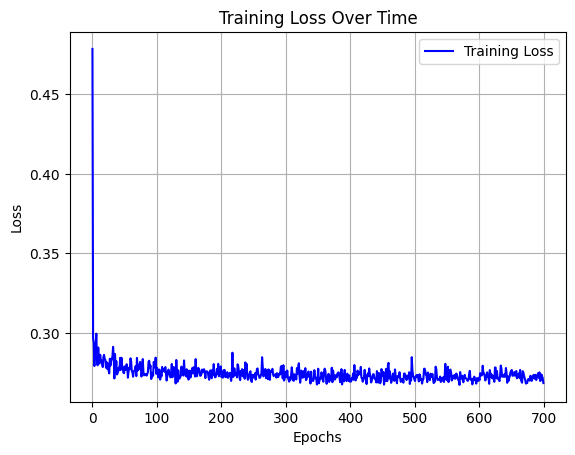

In [ ]:
criterion = torch.nn.L1Loss()
# Setup optimiser
optim = torch.optim.Adam(model.parameters(), lr=0.007, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=200, gamma=0.8)


epochs = 700
loss_values = []
val_values = []
# Train the model
for epoch in range(epochs):
  epoch_loss = 0  # Initialize epoch loss at the start of each epoch
  for batch_x, batch_y in train_loader:
    y_predict = model(batch_x)
    loss = criterion(y_predict, batch_y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    epoch_loss += loss.item()

  # Calculate the average loss for the epoch
  avg_loss = epoch_loss / len(train_loader)
  loss_values.append(avg_loss)

    # Print loss every 200 epochs
  if epoch % 20 == 0:
    print(f'Epoch {epoch}, Avg Loss: {avg_loss}')
    scheduler.step()










# Plotting the loss curve
plt.plot(range(epochs), loss_values, label="Training Loss", color='blue')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')

# Show the grid and the plot
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
with torch.no_grad():
  y_pred_train_s = model(x_train_s)
  y_pred_train = y_scaler_q4.inverse_transform(y_pred_train_s.numpy())
  y_train = y_scaler_q4.inverse_transform(y_train_s.numpy())
  r2_train = r2_score(y_train, y_pred_train)
  mae_train = mean_absolute_error(y_train, y_pred_train)
  print(f'Train R2: {r2_train:.3f} Train MAE: {mae_train:.1f}mm')

  y_pred_test_s = model(x_test_s)
  y_pred_test = y_scaler_q4.inverse_transform(y_pred_test_s.numpy())
  r2_test = r2_score(y_test, y_pred_test)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  print(f'Test R2: {r2_test:.3f} Test MAE: {mae_test:.1f}mm')

Train R2: 0.879 Train MAE: 33.2mm
Test R2: 0.864 Test MAE: 33.8mm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
torch.save(model.state_dict(), '/content/drive/My Drive/Colab Notebooks/PADL Notebooks/Coursework Submission/q4_weights.pkl')


Mounted at /content/drive


**Question 5a**

1. The model is a CNN rather than a regular MLP, making it more suitable for image classification tasks like the one at hand.

2. The input and output layers are appropriately sized: 1×160×160 for the greyscale input images, and 3 for the output classes, making it well-suited for this classification task.
3. Image preprocessing transforms RGB images of size 3×256×256 to greyscale 1×160×160. This significantly reduces input layer size and the number of model weights, enabling a smaller model (<20MB) while still preserving enough detail for accurate classification.
4. The four convolutional layers — each with convolution, batch normalization, ReLU, and max pooling — extract hierarchical features effectively, enabling strong spatial abstraction.
5. MLP Head: A hidden layer of size 128 with ReLU (and Dropout of 0.5 to help prevent overfitting) offers a good trade-off between performance and parameter count, followed by a final linear layer that outputs class scores.
6. Training Setup: The model was trained using Adam (the GOAT!) with a learning rate of 0.001 and CrossEntropyLoss for 20 epochs, leading to stable convergence and good performance.
7. CrossEntropyLoss was chosen because it is appropriate for multi-class classification tasks like this one.

**Question 5b**

In [ ]:
import os
import shutil
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np

# Mount and copy from Google Drive to local Colab storage (if needed)
from google.colab import drive
drive.mount('/content/drive/')

drive_dataset_path = '/content/drive/My Drive/Colab Notebooks/PADL Notebooks/Coursework Submission/garment_images'
local_dataset_path = '/content/garment_images'

if os.path.exists(local_dataset_path) == False:
    shutil.copytree(drive_dataset_path, local_dataset_path)

# Paths
csv_file = os.path.join(local_dataset_path, 'train_labels.csv')
root_dir = local_dataset_path

print(str(csv_file))
print(str(root_dir))

# Dataset definition
class GarmentDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = self.labels_df.iloc[idx, 0]
        label = int(self.labels_df.iloc[idx, 1])
        img_path = os.path.join(self.root_dir, str(label), img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

# Transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

# Create dataset and split
dataset = GarmentDataset(csv_file=csv_file, root_dir=root_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

torch.manual_seed(5)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/garment_images/train_labels.csv
/content/garment_images


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.convolutions = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 10 * 10, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 3)
        )

    def forward(self, x):
        x = self.convolutions(x)
        x = self.mlp(x)
        return x

In [ ]:
# Prep for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

In [ ]:
# training
for epoch in range(num_epochs):
    model.train()
    running_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = loss_func(outputs, labels)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 0.9712
Epoch 2, Loss: 0.2068
Epoch 3, Loss: 0.1807
Epoch 4, Loss: 0.1702
Epoch 5, Loss: 0.1502
Epoch 6, Loss: 0.1437
Epoch 7, Loss: 0.1345
Epoch 8, Loss: 0.1103
Epoch 9, Loss: 0.0948
Epoch 10, Loss: 0.1321
Epoch 11, Loss: 0.1012
Epoch 12, Loss: 0.1168
Epoch 13, Loss: 0.0983
Epoch 14, Loss: 0.0837
Epoch 15, Loss: 0.0788
Epoch 16, Loss: 0.0683
Epoch 17, Loss: 0.0536
Epoch 18, Loss: 0.0837
Epoch 19, Loss: 0.0629
Epoch 20, Loss: 0.0503


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        probability_distrubution = F.softmax(outputs, dim=1)
        predicted = torch.argmax(probability_distrubution, dim=1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * (correct/total)
print(f"Test Accuracy: {accuracy:.2f}%")



Test Accuracy: 95.25%


In [ ]:
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/PADL Notebooks/Coursework Submission/q5_weights.pkl")

**Question 6a**

1. The architecture uses a convolutional encoder that progressively downsamples the input image and increases feature channels, effectively capturing hierarchical features.
2. A fully connected layer compresses the extracted features into a 32-dimensional latent vector, complying with the task’s latent space requirement.
3. The decoder mirrors the encoder using transposed convolutions to reconstruct the image back to its original 192×160 size. Images where used in their original sizes to negate any reduction in image quality while having model weights below the 20Mb requirement.
4. ReLU activations promote non-linear learning, and the final Sigmoid ensures outputs are in the (0, 1) range suitable for grayscale images.

5. No preprocessing for images was used as model weights were below requirement, therefore there was no need to try and reduce image input size in order to reduce model size.

**Question 6b**

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from skimage.metrics import structural_similarity as ssim
from torch.utils.data import random_split
import shutil

In [ ]:
# Import the dataset from goole drive to the local session storage
from google.colab import drive
drive.mount('/content/drive')

drive_dataset_path = '/content/drive/My Drive/Colab Notebooks/PADL Notebooks/Coursework Submission/face_images'
local_dataset_path = '/content/face_images'

# copy if not already
if os.path.exists(local_dataset_path) == False:
    shutil.copytree(drive_dataset_path, local_dataset_path)

root_dir = local_dataset_path

Mounted at /content/drive


In [ ]:
# Define the faces dataset
class FacesDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # creates a list of all file names
        self.image_files = []
        for file in os.listdir(root_dir):
            # only add file if its a jpg or jpeg
            if file.lower().endswith(".jpg") or file.lower().endswith(".jpeg"):
                self.image_files.append(file)


    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image

# Transform images to a vector
transform = transforms.Compose([
    transforms.ToTensor(),
])



#instantiate the faces dataset
dataset = FacesDataset(root_dir, transform=transform)



# calculate train and test set sizes
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size

# randomly split the dataset into train and validation split
torch.manual_seed(3)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU(),
        )
        self.flatten = nn.Flatten()
        self.mlp_enc = nn.Linear(256 * 12 * 10, latent_dim)

        # Decoder
        self.mlp_dec = nn.Linear(latent_dim, 256 * 12 * 10)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (256, 12, 10)),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 4, 2, 1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        return self.mlp_enc(x)

    def decode(self, z):
        x = self.mlp_dec(z)
        return self.decoder(x)

    def forward(self, x):
        return self.decode(self.encode(x))


In [ ]:
# Training prep
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = AutoEncoder().to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()


cuda


In [ ]:
train_losses = []
val_losses = []

for epoch in range(20):
    model.train()
    running_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimiser.zero_grad()
        recon = model(batch)
        loss = loss_func(recon, batch)
        loss.backward()
        optimiser.step()
        running_loss += loss.item()

    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    print(f"Epoch {epoch+1}, Train Loss: {epoch_train_loss:.4f}")


    model.eval()
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            batch = batch.to(device)
            reconstruction = model(batch)
            val_loss += loss_func(reconstruction, batch).item()

    mean_val_loss = val_loss / len(val_loader)

    val_losses.append(mean_val_loss)

    print(f"Validation Loss: {mean_val_loss:.4f}")

Epoch 1, Train Loss: 0.0450
Validation Loss: 0.0233
Epoch 2, Train Loss: 0.0216
Validation Loss: 0.0184
Epoch 3, Train Loss: 0.0158
Validation Loss: 0.0116
Epoch 4, Train Loss: 0.0104
Validation Loss: 0.0092
Epoch 5, Train Loss: 0.0087
Validation Loss: 0.0078
Epoch 6, Train Loss: 0.0074
Validation Loss: 0.0070
Epoch 7, Train Loss: 0.0062
Validation Loss: 0.0057
Epoch 8, Train Loss: 0.0052
Validation Loss: 0.0050
Epoch 9, Train Loss: 0.0045
Validation Loss: 0.0049
Epoch 10, Train Loss: 0.0043
Validation Loss: 0.0048
Epoch 11, Train Loss: 0.0036
Validation Loss: 0.0038
Epoch 12, Train Loss: 0.0032
Validation Loss: 0.0040
Epoch 13, Train Loss: 0.0030
Validation Loss: 0.0035
Epoch 14, Train Loss: 0.0028
Validation Loss: 0.0033
Epoch 15, Train Loss: 0.0025
Validation Loss: 0.0030
Epoch 16, Train Loss: 0.0023
Validation Loss: 0.0030
Epoch 17, Train Loss: 0.0024
Validation Loss: 0.0032
Epoch 18, Train Loss: 0.0023
Validation Loss: 0.0029
Epoch 19, Train Loss: 0.0021
Validation Loss: 0.0027
Ep

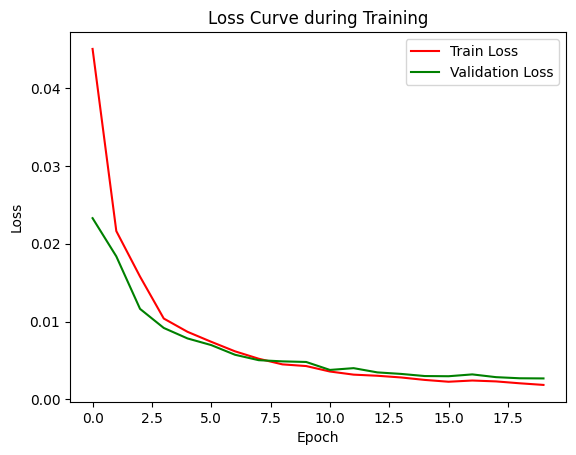

In [ ]:
plt.plot()
plt.plot(train_losses, label="Train Loss", color="red")
plt.plot(val_losses, label="Validation Loss", color="green")
plt.title("Loss Curve during Training")
plt.xlabel("Epoch")

plt.ylabel("Loss")
plt.legend()

The training and validation losses steadily decrease and converge over time, which suggests that the learning rate is well-chosen. A higher learning rate might have caused instability or spiking in the loss curve, while a lower learning rate could have led to slow progress or early stagnation.

Additionally, the fact that the validation loss closely follows the training loss, with only a small gap, indicates that the model is not overfitting and generalises well to unseen data. This suggests that no additional regularisation (e.g. dropout or weight decay) was necessary.

Therefore, the current hyperparameter choices are appropriate for this task.

**Question 6c**

In [ ]:
# Evaluate the performance (SSIM) on the validation set after training is complete
def compute_batch_ssim(originals, reconstructions):
    ssim_scores = []
    for i in range(originals.size(0)):
        orig = originals[i].squeeze().cpu().numpy()
        recon = reconstructions[i].squeeze().cpu().numpy()
        score = ssim(orig, recon, data_range=1.0)
        ssim_scores.append(score)
    return np.mean(ssim_scores)

model.eval()
ssim_total = 0

with torch.no_grad():
    for batch in val_loader:
        batch = batch.to(device)
        reconstructed = model(batch)
        ssim_total += compute_batch_ssim(batch, reconstructed)

mean_ssim = ssim_total / len(val_loader)
print(f"Validation SSIM: {mean_ssim:.4f}")

Validation SSIM: 0.7615


In [ ]:
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/PADL Notebooks/Coursework Submission/q6_weights.pkl")